In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import pyecharts
import plotly

ERROR:lml.utils:failed to import pyecharts_snapshot
Traceback (most recent call last):
  File "/anaconda3/lib/python3.7/site-packages/lml/utils.py", line 43, in do_import
    plugin_module = __import__(plugin_module_name)
ModuleNotFoundError: No module named 'pyecharts_snapshot'


In [2]:
path = '/Users/panbingqing/Documents/个人/kaggle/google-play-store-apps/'
reviews = pd.read_csv(path +'googleplaystore_user_reviews.csv') # 应用评论
palystore = pd.read_csv(path + 'googleplaystore.csv') #信用信息

In [3]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
App                       64295 non-null object
Translated_Review         37427 non-null object
Sentiment                 37432 non-null object
Sentiment_Polarity        37432 non-null float64
Sentiment_Subjectivity    37432 non-null float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [4]:
palystore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            9367 non-null float64
Reviews           10841 non-null object
Size              10841 non-null object
Installs          10841 non-null object
Type              10840 non-null object
Price             10841 non-null object
Content Rating    10840 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null object
Current Ver       10833 non-null object
Android Ver       10838 non-null object
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [5]:
palystore.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [6]:
reviews.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


#清洗数据
评论数缺失值较多

In [7]:
#缺失值处理
reviews.isnull().sum(axis=1).value_counts() #每行有四个缺失值的一共有26863行，可删掉这些行
reviews = reviews.dropna()

palystore.isnull().sum().value_counts()
palystore = palystore.dropna()

In [8]:
#去掉installs的+，号
palystore['Installs'] = palystore['Installs'].apply(lambda x: x.replace('+', '') if '+' in str(x) else x)
palystore['Installs'] = palystore['Installs'].apply(lambda x: x.replace(',', '') if ',' in str(x) else x)
palystore['Installs'] = palystore['Installs'].apply(lambda x: int(x))

In [9]:
#处理size列
palystore['Size'] = palystore['Size'].apply(lambda x : x.replace('M','') if 'M' in str(x) else x)
palystore['Size'] = palystore['Size'].apply(lambda x : x.replace('Varies with device','') if 'Varies with device' in str(x) else x)
palystore['Size'] = palystore['Size'].apply(lambda x : float(x.replace('k',''))/1000 if 'k' in str(x) else x)

#处理price列
palystore['Price'] = palystore['Price'].apply(lambda x: str(x).replace('$', '') if '$' in str(x) else str(x))
#palystore['Size'] = palystore['Size'].apply(lambda x: float(x))
palystore['Price'] = palystore['Installs'].apply(lambda x: float(x))
palystore['Reviews'] = palystore['Reviews'].apply(lambda x: int(x))

In [10]:
#日期处理
palystore['Last Updated']= pd.to_datetime(palystore['Last Updated'])

开始分析数据

分类别看app的数量占比




In [11]:
from pyecharts import Pie
pie = Pie('active_category')
number_categary = palystore.Category.value_counts()
pie.add('',number_categary.index,number_categary.values,is_label_show=True,is_legend_show=False)

##### 可以看出家庭类型和游戏类为两大巨头

## Rating

In [12]:
palystore.Rating.describe()

count    9360.000000
mean        4.191838
std         0.515263
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

In [13]:
palystore = palystore.set_index(palystore.App)
rating_count = palystore.Rating.value_counts().sort_index()
rating_count.index
rating_count.values
from pyecharts import Bar,Line
bar = Bar('Total Rating Changing')
line = Line('')
#line.add(' ',list(rating_count.index),list(rating_count.values))
bar.add(' ',rating_count.index,rating_count.values)

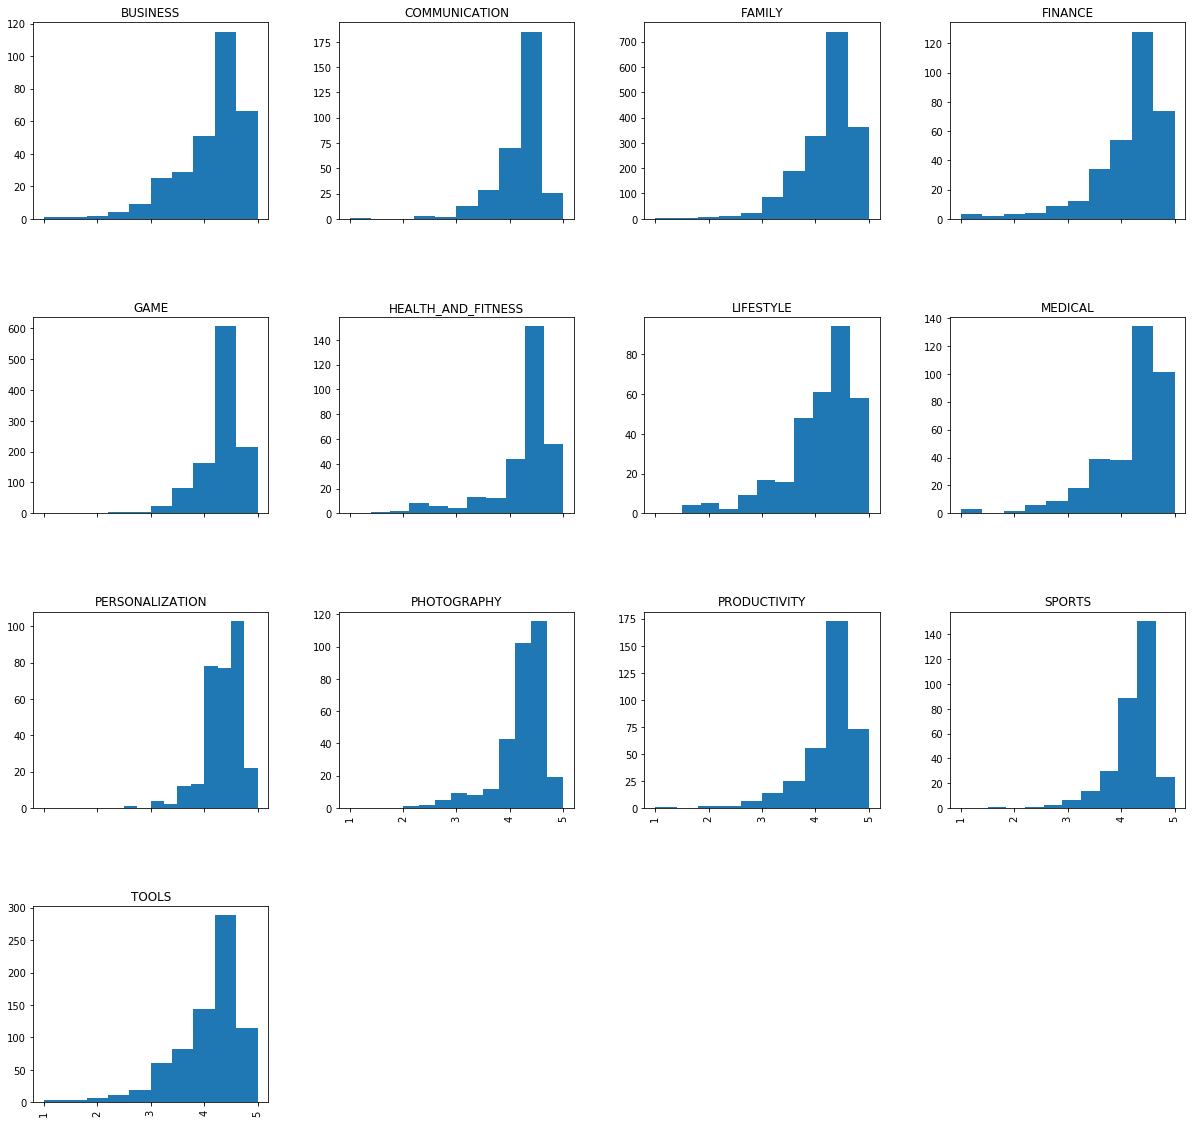

In [14]:
#每中类型的app的rating情况
groups = palystore.groupby('Category').filter(lambda x: len(x) > 286)
array = groups['Rating'].hist(by=groups['Category'], sharex=True, figsize=(20,20))

TypeError: cannot perform reduce with flexible type

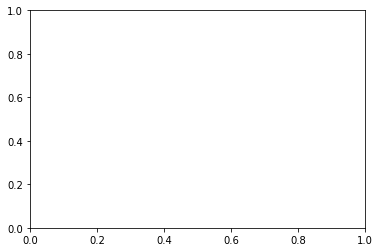

In [23]:
#根据箱线图来看rating和category 情况
# from pyecharts import Boxplot
# box = Boxplot('各类app箱线图分布情况')
# box.add(' ',palystore.Category,palystore.Rating)



Text(0.5,1,'Boxplot of Rating VS Category')

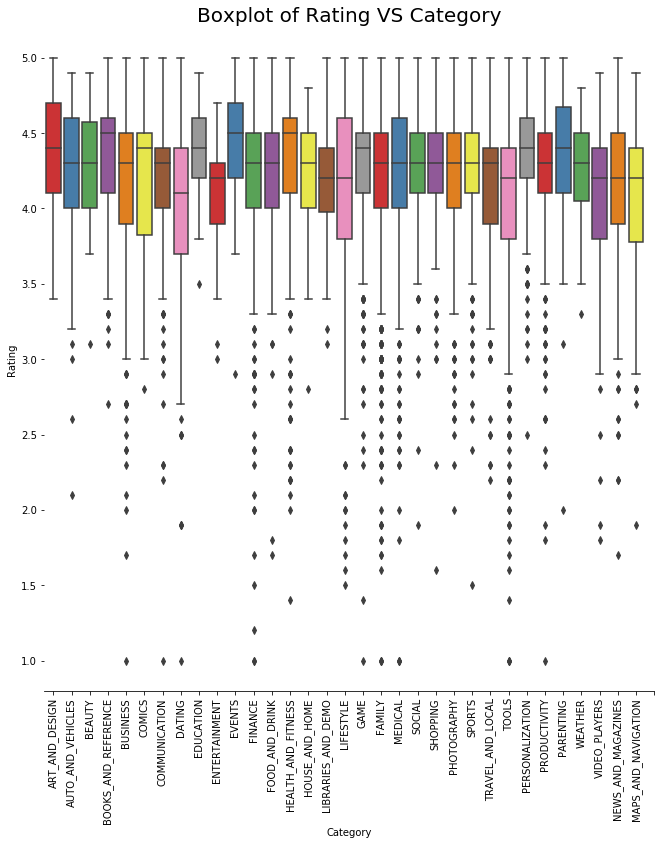

In [21]:
g = sns.catplot(x="Category",y="Rating",data=palystore, kind="box", height = 10 ,palette = "Set1")
g.despine(left=True)
g.set_xticklabels(rotation=90)
g.set( xticks=range(0,34))
g = g.set_ylabels("Rating")
plt.title('Boxplot of Rating VS Category',size = 20)

In [16]:
palystore.sample(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
App,,,,,,,,,,,,,
MyPlate Calorie Tracker,MyPlate Calorie Tracker,HEALTH_AND_FITNESS,4.6,24094,18,1000000,Free,1000000.0,Everyone,Health & Fitness,2018-07-09,3.3.0(1),4.1 and up
ASUS SuperNote,ASUS SuperNote,PRODUCTIVITY,4.5,26559,,10000000,Free,10000000.0,Everyone,Productivity,2017-04-14,Varies with device,Varies with device
Glowing Flowers Live Wallpaper,Glowing Flowers Live Wallpaper,PERSONALIZATION,4.2,66730,7.0,5000000,Free,5000000.0,Everyone,Personalization,2018-05-21,18.0,4.1 and up
Modern Counter Global Strike 3D V2,Modern Counter Global Strike 3D V2,GAME,4.0,368,48,50000,Free,50000.0,Everyone 10+,Action,2018-03-28,1.7,4.1 and up
FreedomPop Diagnostics,FreedomPop Diagnostics,TOOLS,2.9,452,7.0,100000,Free,100000.0,Everyone,Tools,2017-07-17,1.03.123.0713,4.0.3 and up
Catalyst AZ,Catalyst AZ,FAMILY,4.8,12,8.4,500,Free,500.0,Teen,Education,2018-06-27,3.8.0,4.1 and up
DN Sync,DN Sync,NEWS_AND_MAGAZINES,4.1,56,0.028,1000,Free,1000.0,Everyone 10+,News & Magazines,2016-06-13,1.15,2.3.3 and up
Red Transporte DF,Red Transporte DF,MAPS_AND_NAVIGATION,4.3,11100,15,500000,Free,500000.0,Everyone,Maps & Navigation,2018-04-28,2.10.0 Summer,4.0.3 and up
FilmoraGo - Free Video Editor,FilmoraGo - Free Video Editor,VIDEO_PLAYERS,4.4,238459,35,10000000,Free,10000000.0,Everyone,Video Players & Editors,2018-06-06,3.1.4,4.2 and up
